## CORRECTOR-TO-BPM RESPONSE MATRIX

The modelling of the linear optics uses the orbit response matrix (ORM) of N BPMs and M correctors defined as
$$ C_{ij}=\frac{\Delta x_i}{\Delta \theta_j} $$
where $\Delta x_i$ is the orbit change at the beam position monitor (BPM) i and $\Delta \theta_j$ is the kick of a corrector magnet  j. 

An accelerator with m-BPMS and n-correctors produces an m x n dimensional response
matrix.

$$C_{mn}=\frac{\sqrt{\beta_m\beta_n}}{2\sin(\pi \nu)}\cos(\pi\nu -\phi(s)+\phi(s_0))$$

The elements of c may be obtained from the machine model or be determined
experimentally by measuring the deviation at each BPM resulting from exciting
each corrector individually.

The task of the orbit correction is to find a set of corrector kicks $\theta$. that satisfy the
following relation:
$\Delta x + C\Delta\theta =0$


Load the lattice - radiation off
Closed orbit before errors


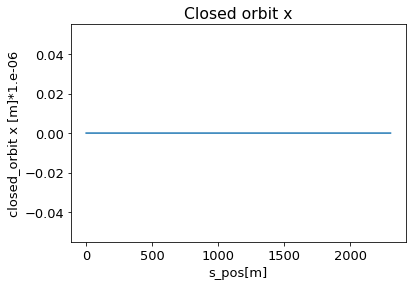

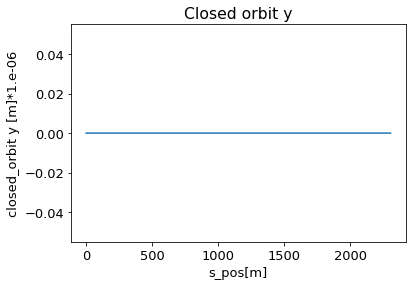

Response_matrix_x 
Execution time: 192.76624178886414 sec
Response_matrix_y
Execution time: 301.4357786178589 sec


In [1]:
import at
from at.load import load_mat
from at import atpass
from at import elements
from matplotlib import pyplot as plt
import at.plot
from numpy import *
import numpy as np
from at import get_refpts
from p3_elements_v24_c4l import *
from random import random
from at_modules_orbit_corrections import *

print(f"Load the lattice - radiation off")


from p3_elements_v24_c4l import *
ring=at.Lattice(ring,energy=6.e9)
ring.radiation_off()


sext_indexes = get_refpts(ring,at.elements.Sextupole)

for i in sext_indexes:
    ring[i].H=ring[i].H*0


print("Closed orbit before errors")


rmsx, rmsy = plot_closedOrbit_all(ring, '*')
#plt.savefig('show_lindata1.png',bbox_inches='tight', pad_inches=0., dpi=500)


print("Response_matrix_x ")
t0 = time.time()
Rx = ResponseMatrix_x(dkick=1.e-6,ring=ring)
t1 = time.time()
print(f"Execution time: {t1 - t0} sec")



print("Response_matrix_y")
t0 = time.time()
Ry = ResponseMatrix_y(dkick=1.e-6,ring=ring)
t1 = time.time()
print(f"Execution time: {t1 - t0} sec")

SVD


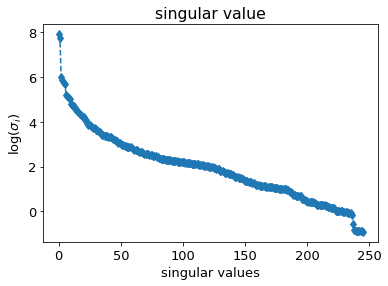

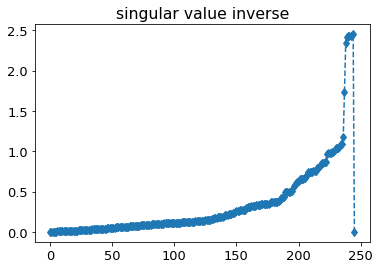

In [2]:
import numpy.linalg
numpy.linalg.cond(Rx)

print("SVD")
# SVD
u, s, vh = np.linalg.svd(Rx, full_matrices=False)
u_1 = np.transpose(u)
s_1 = np.transpose(s)
vh_1 = np.transpose(vh)
#plt.plot(s)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.xlabel('singular values')
plt.ylabel('$\log(\sigma_i)$')
plt.show()

# Cut_off
b=1./s
#n_svd =245
n_svd =245
b[n_svd:] = 0
sig =  np.diag(b)
Rvx = np.transpose(vh) @ sig @ np.transpose(u)

plt.plot(b, 'd--')
plt.title('singular value inverse')
plt.show()

simulate errors
SVD


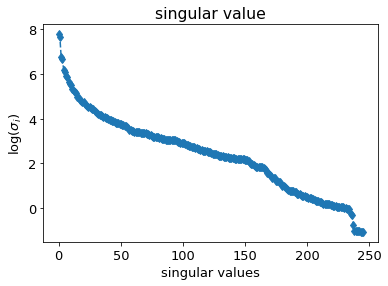

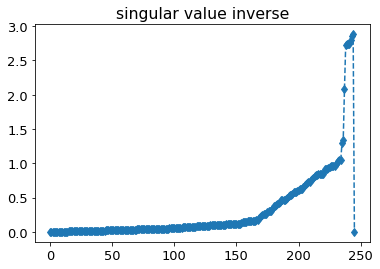

In [3]:
print("simulate errors")

#Qs_strength
## simulate_errors


import numpy.linalg
numpy.linalg.cond(Ry)

print("SVD")
# SVD
u, s, vh = np.linalg.svd(Ry, full_matrices=False)
u_1 = np.transpose(u)
s_1 = np.transpose(s)
vh_1 = np.transpose(vh)
#plt.plot(s)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.xlabel('singular values')
plt.ylabel('$\log(\sigma_i)$')
plt.show()

# Cut_off
b=1./s
#n_svd =245
n_svd =245
b[n_svd:] = 0
sig =  np.diag(b)
Rvy = np.transpose(vh) @ sig @ np.transpose(u)

plt.plot(b, 'd--')
plt.title('singular value inverse')
plt.show()

simulate errors
simulating perturbed machine...
Done...
Closed orbit after errors


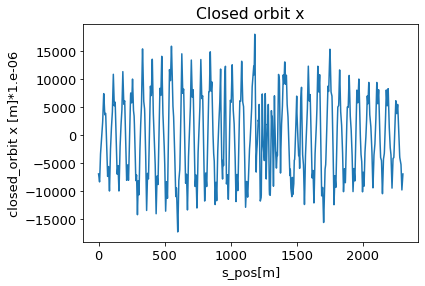

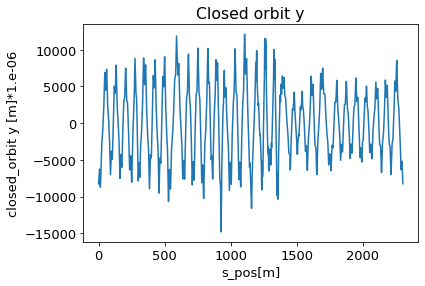

In [4]:
#Qs_strength
## simulate_errors
print("simulate errors")

errorQ = 0
tiltQ =0
shiftQx =1.e-4
shiftQy = 1.e-4

quads_info_error = simulateError(ring, errorQ, tiltQ, shiftQx,shiftQy, debug=False)
print("Closed orbit after errors")
rmsx_err, rmsy_err = plot_closedOrbit_all(ring, '*')

results
Closed orbit after correction


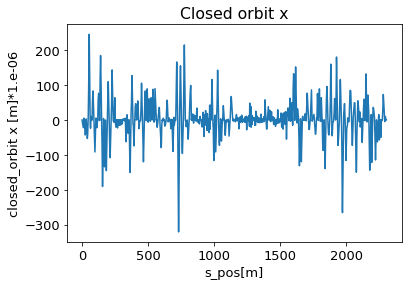

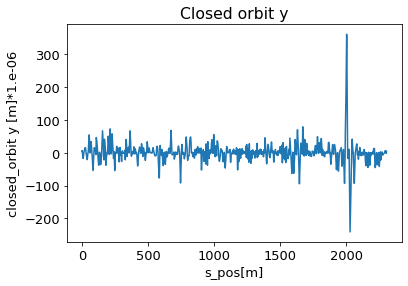

In [5]:
print("results")
# closed orbit after error

bpm_indexes = get_refpts(ring, elements.Monitor)
lindata0, tune, chrom, lindata = ring.linopt(get_chrom=True, refpts=bpm_indexes)
closed_orbitx = lindata['closed_orbit'][:, 0]
closed_orbity = lindata['closed_orbit'][:, 2]
#Corrector_strength

CSx = np.dot(np.transpose(Rvx),-closed_orbitx)
CSy = np.dot(np.transpose(Rvy),-closed_orbity)


correctors_indexes = get_refpts(ring, elements.Corrector)
for m in range(len(correctors_indexes)):
    ring[correctors_indexes[m]].KickAngle  = [0,0]
    ring[correctors_indexes[m]].KickAngle  = [CSx[m],CSy[m]]


# Result
print("Closed orbit after correction")
rmsx_cor, rmsy_cor = plot_closedOrbit_all(ring, '*')


In [8]:
rmsx_err*100

0.7345829206181201

In [9]:
rmsy_err*100

0.5055167815290221

In [10]:
rmsx_cor*100

0.0030128758729160215

In [12]:
rmsy_cor*100

0.0018873533341788099